     Track ID  Frame  Center X  Center Y  Mask Area
0         285      2       479       201       5693
1         285      3       455       209       6687
2         285      4       472       217       6264
3         285      5       470       214       9760
4         285      6       461       209      10246
..        ...    ...       ...       ...        ...
97        285    101      1435       605      28216
98        285    102      1433       602      28289
99        285    103      1433       602      28001
100       285    104      1424       599      27672
101       285    105      1417       597      27630

[102 rows x 5 columns]


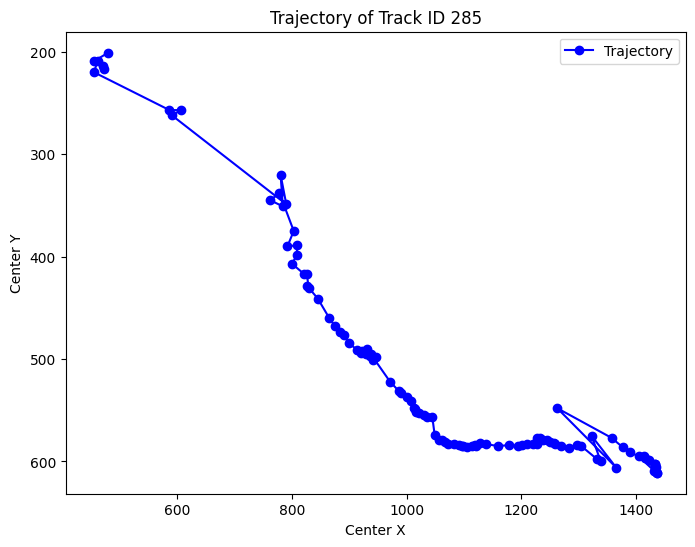

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_file = 'Dataset/trajectories/2.csv'

# Read the CSV into a pandas DataFrame
df = pd.read_csv(csv_file)

# Specify the Track ID you want to filter
desired_track_id = 285

# Filter the DataFrame for the desired Track ID
filtered_df = df[df['Track ID'] == desired_track_id]

# Reset the index for the filtered DataFrame
filtered_df = filtered_df.reset_index(drop=True)

# Display the filtered data
print(filtered_df)

# Extract "Center X" and "Center Y" coordinates
x_coords = filtered_df['Center X']
y_coords = filtered_df['Center Y']

# Create a plot with an inverted y-axis
plt.figure(figsize=(8, 6))
plt.plot(x_coords, y_coords, marker='o', color='b', label='Trajectory')

# Invert the y-axis
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Center X')
plt.ylabel('Center Y')
plt.title(f'Trajectory of Track ID {desired_track_id}')
plt.legend()

# Show the plot
plt.show()


In [3]:
from statsmodels.tsa.api import VAR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
filtered_df['VAR Prediction X'] = np.nan
filtered_df['VAR Prediction Y'] = np.nan
var_data = filtered_df[['Center X', 'Center Y']]

In [6]:
# Loop through the filtered DataFrame to predict the next positions
for i in range(len(filtered_df) - 1):
    coordX = filtered_df.at[i, 'Center X']
    coordY = filtered_df.at[i, 'Center Y']
    # VAR prediction
    if i >= 2:  # VAR requires at least 2 previous points
        model = VAR(var_data[:i + 1])
        var_results = model.fit(maxlags=1)  # You can experiment with lags
        var_pred = var_results.forecast(var_data[:i + 1].values, steps=1)
        filtered_df.at[i + 1, 'VAR Prediction X'] = var_pred[0][0]
        filtered_df.at[i + 1, 'VAR Prediction Y'] = var_pred[0][1]


In [7]:
filtered_df['Error_VAR_X'] = filtered_df['VAR Prediction X'] - filtered_df['Center X']
filtered_df['Error_VAR_Y'] = filtered_df['VAR Prediction Y'] - filtered_df['Center Y']

In [8]:
filtered_df

,Track ID,Frame,Center X,Center Y,Mask Area,VAR Prediction X,VAR Prediction Y,Error_VAR_X,Error_VAR_Y
0,285,2,479,201,5693,NaN,NaN,NaN,NaN
1,285,3,455,209,6687,NaN,NaN,NaN,NaN
2,285,4,472,217,6264,NaN,NaN,NaN,NaN
3,285,5,470,214,9760,490.056029,225.303035,20.056029,11.303035
4,285,6,461,209,10246,468.722561,213.951220,7.722561,4.951220
...,...,...,...,...,...,...,...,...,...
97,285,101,1435,605,28216,1421.544828,595.334672,-13.455172,-9.665328
98,285,102,1433,602,28289,1441.907676,605.531887,8.907676,3.531887
99,285,103,1433,602,28001,1439.548853,602.449727,6.548853,0.449727
100,285,104,1424,599,27672,1439.171251,602.423796,15.171251,3.423796


In [ ]:
import os
folder_path = 'Dataset/trajectorypredictions'
os.makedirs(folder_path, exist_ok=True)

filtered_df.to_csv(os.path.join(folder_path, '20_predictions_ID346.csv'))

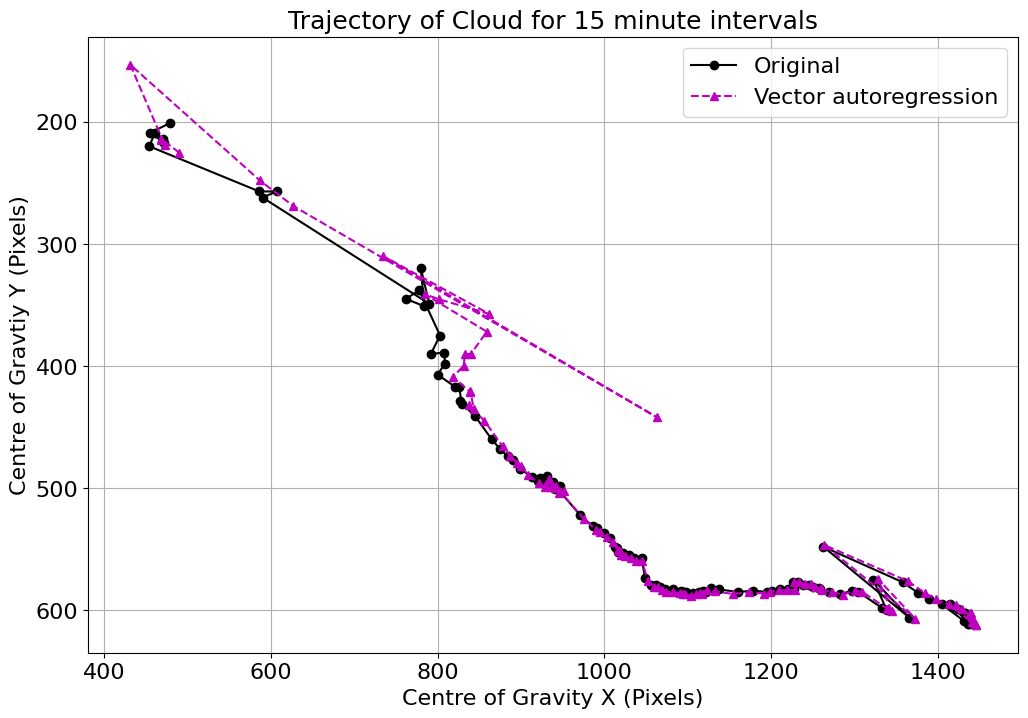

In [10]:
predicted_x_var = filtered_df['VAR Prediction X']
predicted_y_var = filtered_df['VAR Prediction Y']
# Create a plot with an inverted y-axis
plt.figure(figsize=(12, 8))

# Original trajectory
plt.plot(x_coords, y_coords, marker='o', color='black', label='Original')

# VAR predictions
plt.plot(predicted_x_var, predicted_y_var, marker='^', color='m', linestyle='--', label='Vector autoregression')

# Invert the y-axis
plt.gca().invert_yaxis()

# Add labels and title
plt.xticks(fontsize=16)  # Set font size for x-axis ticks
plt.yticks(fontsize=16)  # Set font size for y-axis ticks
plt.xlabel('Centre of Gravity X (Pixels)',fontsize=16)
plt.ylabel('Centre of Gravtiy Y (Pixels)', fontsize=16)
plt.title(f'Trajectory of Cloud for 15 minute intervals',fontsize=18)
plt.legend(prop={'size': 16})
plt.grid()

plt.show()